# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# check data
index = random.randint(0, len(X_train))
index2 = random.randint(0, len(X_train))
#print("the length of x train is ", len(X_train))
image = X_train[index].squeeze()
image2 = X_train[index2].squeeze()
#print(image[0][0][0])

#def rgb2gray2(rgb):
#    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

plt.figure(figsize=(1,1))   
plt.imshow(image)


plt.figure(figsize=(1,1))
plt.imshow(image2)


print(y_train[index])
print(y_train[index2])



5
10


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of y training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Valid data shape = (32, 32, 3)
Number of classes = 43
max index is  2
min index is  0

repeat needed times is
[1830, 30, 0, 750, 240, 360, 1650, 720, 750, 690, 210, 840, 120, 90, 1320, 1470, 1650, 1020, 930, 1830, 1710, 1740, 1680, 1560, 1770, 660, 1470, 1800, 1530, 1770, 1620, 1320, 1800, 1411, 1650, 930, 1680, 1830, 150, 1740, 1710, 1800, 1800]
y train times  [(0, 180), (19, 180), (37, 180), (27, 210), (32, 210), (41, 210), (42, 210), (24, 240), (29, 240), (21, 270), (39, 270), (20, 300), (40, 300), (22, 330), (36, 330), (6, 360), (16, 360), (34, 360), (30, 390), (23, 450), (28, 480), (15, 540), (26, 540), (33, 599), (14, 690), (31, 690), (17, 990), (18, 1080), (35, 1080), (11, 1170), (3, 1260), (8, 1260), (7, 1290), (9, 1320), (25, 1350), (5, 1650), (4, 1770), (10, 1800), (38, 1860), (12, 1890), (13, 1920), (1, 1980), (2, 2010)]


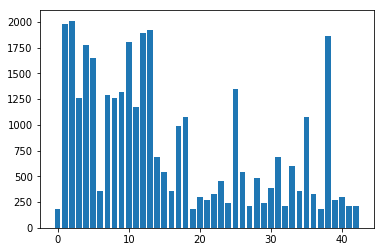

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Number of training examples
n_train = len(X_train)
n_y_train = len(y_train)
# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
valid_shape = X_valid[3].shape
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of y training examples =", n_y_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Valid data shape =", valid_shape)
print("Number of classes =", n_classes)

# Find the times of each sign appearance in training set
unique, counts = np.unique(y_train, return_counts=True)
dict_count = dict(zip(unique, counts))

max_idx = max(dict_count,key=dict_count.get)
print("max index is ", max(dict_count,key=dict_count.get))

min_idx = min(dict_count,key=dict_count.get)
print("min index is ", min(dict_count,key=dict_count.get))

repeat_times = []
counts_graph = []
for v in dict_count:
    times = dict_count[max_idx]-dict_count[v]
    counts_graph.append(dict_count[v])
    repeat_times.append(times)
    
    
plt.bar(range(43),counts_graph)
print()
print("repeat needed times is")
print(repeat_times)


import operator
sorted_count = sorted(dict_count.items(), key=operator.itemgetter(1))
print("y train times ",sorted_count)

max test index is  2
min test index is  0

test repeat needed times is
[690, 30, 0, 300, 90, 120, 600, 300, 300, 270, 90, 330, 60, 30, 480, 540, 600, 390, 360, 690, 660, 660, 630, 600, 660, 270, 570, 690, 600, 660, 600, 480, 690, 540, 630, 360, 630, 690, 60, 660, 660, 690, 660]
y test times  [(0, 60), (19, 60), (27, 60), (32, 60), (37, 60), (41, 60), (20, 90), (21, 90), (24, 90), (29, 90), (39, 90), (40, 90), (42, 90), (22, 120), (34, 120), (36, 120), (6, 150), (16, 150), (23, 150), (28, 150), (30, 150), (26, 180), (15, 210), (33, 210), (14, 270), (31, 270), (17, 360), (18, 390), (35, 390), (11, 420), (3, 450), (7, 450), (8, 450), (9, 480), (25, 480), (5, 630), (4, 660), (10, 660), (12, 690), (38, 690), (1, 720), (13, 720), (2, 750)]


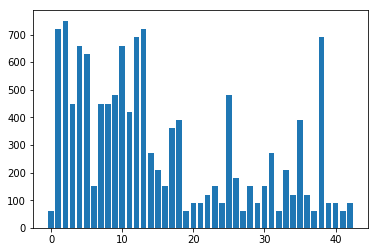

In [4]:
# Visualizations will be shown in the notebook.
%matplotlib inline

# Find the times of each sign appearance in test set

unique_t, counts_t = np.unique(y_test, return_counts=True)
dict_count_test = dict(zip(unique_t, counts_t))

max_test_idx = max(dict_count_test,key=dict_count_test.get)
print("max test index is ", max(dict_count_test,key=dict_count_test.get))

min_test_idx = min(dict_count_test,key=dict_count_test.get)
print("min test index is ", min(dict_count_test,key=dict_count_test.get))

test_repeat_times = []
test_graph = []
for v in dict_count_test:
    test_graph.append(dict_count_test[v])
    test_times = dict_count_test[max_test_idx]-dict_count_test[v]
    test_repeat_times.append(test_times)

print()
print("test repeat needed times is")
print(test_repeat_times)
plt.bar(range(43),test_graph)

import operator
test_sorted_count = sorted(dict_count_test.items(), key=operator.itemgetter(1))
print("y test times ",test_sorted_count)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

import matplotlib.image as mpimg
from skimage.color import rgb2gray
import cv2

36
2
10
12
4
13
4


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


40
5
33
the length of x train is  34799


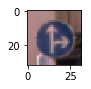

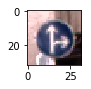

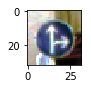

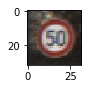

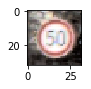

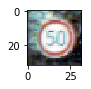

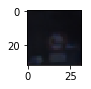

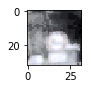

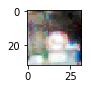

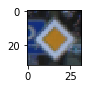

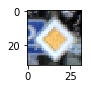

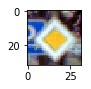

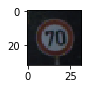

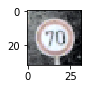

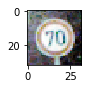

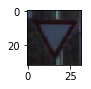

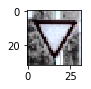

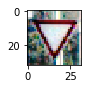

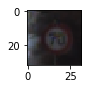

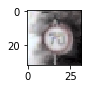

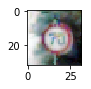

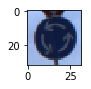

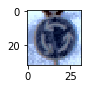

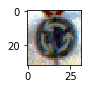

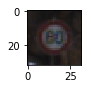

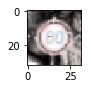

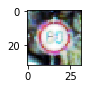

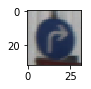

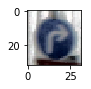

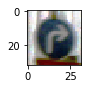

In [6]:
#ALL IMAGE normalization function
def All_color_normalize(rgb):
    
    img_yuv = cv2.cvtColor(rgb,cv2.COLOR_BGR2YUV)
    
    #historam equalization
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    
    img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
    
    image_shape = img_output.shape
    #print("image shape",image_shape)
    
    return img_output

def All_color_normalize2(rgb):
    
    b,g,r = cv2.split(rgb)
    
    #historam equalization
    blue = cv2.equalizeHist(b)
    green = cv2.equalizeHist(g)
    red = cv2.equalizeHist(r)
    
    img_output = cv2.merge((blue,green,red))
    
    image_shape = img_output.shape
    #print("image shape",image_shape)
    
    return img_output



for i in range(0,10):
    index = random.randint(0, len(X_test))
    image = X_test[index]
    img = All_color_normalize(image)
    img2 = All_color_normalize2(image)
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.figure(figsize=(1,1))
    plt.imshow(img2)
    print(y_test[index])
    
print("the length of x train is ", len(X_train))

#print(image[0][0][0])









33
34





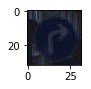

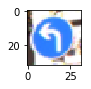

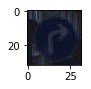

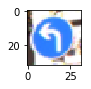

In [7]:

#Normalize RGB number
def color_normalize(rgb):
    
    norm=np.zeros((32,32,3),np.float32)
    norm_rgb=np.zeros((32,32,3),np.uint8)
    
    b=rgb[:,:,0]
    g=rgb[:,:,1]
    r=rgb[:,:,2]

    sum=b+g+r

    norm[:,:,0]=b/255.0
    norm[:,:,1]=g/255.0
    norm[:,:,2]=r/255.0

    #norm_rgb=cv2.convertScaleAbs(norm)
    return norm
        

index = random.randint(0, len(X_valid))
index2 = random.randint(0, len(X_valid))

image = X_valid[index]
image2 = X_valid[index2]

plt.figure(figsize=(1,1))
plt.imshow(image)

plt.figure(figsize=(1,1))
plt.imshow(image2)

image = color_normalize(image)
image2 = color_normalize(image2)

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_valid[index])

plt.figure(figsize=(1,1))
plt.imshow(image2)
print(y_valid[index2])

#print(image)
print()
print()
print()
#print(image2)

In [8]:
#data argumenting
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    #img = augment_brightness_camera_images(img)
    
    return img


Image data shape = (32, 32, 3)
<built-in function len>
Number of training examples = 86388
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Valid data shape = (32, 32, 3)
Number of classes = 43

repeat needed times is
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
max index is  2
min index is  0

repeat needed times is
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y train times  [(0, 2009), (1, 2009), (3, 2009), (4, 2009), (5, 2009), (6, 2009), (7, 2009), (8, 2009), (9, 2009), (10, 2009), (11, 2009), (12, 2009), (13, 2009), (14, 2009), (15, 2009), (16, 2009), (17, 2009), (18, 2009), (19, 2009), (20, 2009), (21, 2009), (22, 2009), (23, 2009), (24, 2009), (25, 2009), (26, 2009), (27, 2009), (28, 2009), (29, 2009), (30, 2009), (31, 2009), (32, 2009), (33, 2009), (34, 2009), (35, 2009), (36, 2009), (37, 2009)

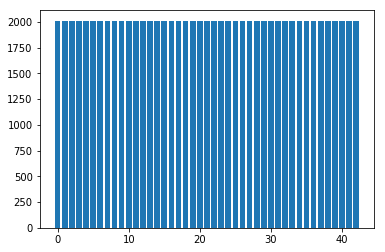

In [9]:
# Visualizations will be shown in the notebook.
%matplotlib inline

#transfer image / adding data set
new_train = []
new_train2 = []
new_y_value=[]

while(repeat_times[min_idx] > 10):
    index = 0
    for image in X_train:
    #print("index is",index)
        sign = y_train[index]
        #print("sign is",sign)
    
        if(repeat_times[sign]-1>0):
            new_image = transform_image(image,20,10,5)
            new_train.append(new_image)
            new_y_value.append(sign)
            index += 1
            repeat_times[sign] = repeat_times[sign]-1
            #print("sign times remain ",repeat_times[sign])
        else:
            index += 1


        
#new_train_reshape = np.reshape(new_train,(-1,32,32,3))
# TODO: What's the shape of an traffic sign image?
image_shape = new_train[0].shape
print("Image data shape =", image_shape)
#X_train = np.concatenate(X_train,new_train)
X_train = np.append(X_train,new_train,axis=0)
print(len)
y_train = np.append(y_train,new_y_value,axis=0)
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[40000].shape
valid_shape = X_valid[3].shape
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Valid data shape =", valid_shape)
print("Number of classes =", n_classes)

print()
print("repeat needed times is")
print(repeat_times)

# Find the times of each sign appearance in training set
unique, counts = np.unique(y_train, return_counts=True)
dict_count = dict(zip(unique, counts))

max_idx = max(dict_count,key=dict_count.get)
print("max index is ", max(dict_count,key=dict_count.get))

min_idx = min(dict_count,key=dict_count.get)
print("min index is ", min(dict_count,key=dict_count.get))

repeat_times = []
train_count = []
for v in dict_count:
    train_count.append(dict_count[v])
    times = dict_count[max_idx]-dict_count[v]
    repeat_times.append(times)

print()
print("repeat needed times is")
print(repeat_times)
plt.bar(range(43),train_count)

import operator
sorted_count = sorted(dict_count.items(), key=operator.itemgetter(1))
print("y train times ",sorted_count)


In [10]:
# For further adding training set to the desired amount
#transfer image / adding data set
new_train = []
new_y_value=[]

#X_train, y_train = shuffle(X_train, y_train)

while(len(new_train) < 15000):
    index = random.randint(0, 34798)
    sign = y_train[index]
    new_image = transform_image(image,20,10,5)
    new_train.append(new_image)
    new_y_value.append(sign)
    index += 1
    
            
       


        
#new_train_reshape = np.reshape(new_train,(-1,32,32,3))
# TODO: What's the shape of an traffic sign image?
image_shape = new_train[0].shape
print("Image data shape =", image_shape)
#X_train = np.concatenate(X_train,new_train)
X_train = np.append(X_train,new_train,axis=0)
y_train = np.append(y_train,new_y_value,axis=0)
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[40000].shape
valid_shape = X_valid[3].shape
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Valid data shape =", valid_shape)
print("Number of classes =", n_classes)



Image data shape = (32, 32, 3)
Number of training examples = 101388
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Valid data shape = (32, 32, 3)
Number of classes = 43


In [11]:
# To evenly distribute all different sign, here do again check the times

# Find the times of each sign appearance in training set
unique, counts = np.unique(y_train, return_counts=True)
dict_count = dict(zip(unique, counts))

max_idx = max(dict_count,key=dict_count.get)
print("max index is ", max(dict_count,key=dict_count.get))

min_idx = min(dict_count,key=dict_count.get)
print("min index is ", min(dict_count,key=dict_count.get))

repeat_times = []
for v in dict_count:
    times = dict_count[max_idx]-dict_count[v]
    repeat_times.append(times)

print()
print("repeat needed times is")
print(repeat_times)


import operator
sorted_count = sorted(dict_count.items(), key=operator.itemgetter(1))
print("y train times ",sorted_count)

new_train = []
new_train2 = []
new_y_value=[]

while(repeat_times[min_idx] > 10):
    index = 0
    for image in X_train:
    #print("index is",index)
        sign = y_train[index]
        #print("sign is",sign)
    
        if(repeat_times[sign]-1>0):
            new_image = transform_image(image,20,10,5)
            new_train.append(new_image)
            new_y_value.append(sign)
            index += 1
            repeat_times[sign] = repeat_times[sign]-1
            #print("sign times remain ",repeat_times[sign])
        else:
            index += 1


        
#new_train_reshape = np.reshape(new_train,(-1,32,32,3))
# TODO: What's the shape of an traffic sign image?
image_shape = new_train[0].shape
print("Image data shape =", image_shape)
#X_train = np.concatenate(X_train,new_train)
X_train = np.append(X_train,new_train,axis=0)
print(len)
y_train = np.append(y_train,new_y_value,axis=0)
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[40000].shape
valid_shape = X_valid[3].shape
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))




print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Valid data shape =", valid_shape)
print("Number of classes =", n_classes)

print()
print("repeat needed times is")
print(repeat_times)



max index is  2
min index is  19

repeat needed times is
[771, 27, 0, 296, 112, 125, 717, 286, 284, 293, 51, 375, 25, 50, 593, 643, 712, 437, 396, 777, 703, 751, 725, 654, 742, 289, 623, 767, 632, 746, 667, 535, 772, 587, 705, 389, 718, 772, 74, 725, 725, 762, 774]
y train times  [(19, 2088), (42, 2091), (32, 2093), (37, 2093), (0, 2094), (27, 2098), (41, 2103), (21, 2114), (29, 2119), (24, 2123), (22, 2140), (39, 2140), (40, 2140), (36, 2147), (6, 2148), (16, 2153), (34, 2160), (20, 2162), (30, 2198), (23, 2211), (15, 2222), (28, 2233), (26, 2242), (14, 2272), (33, 2278), (31, 2330), (17, 2428), (18, 2469), (35, 2476), (11, 2490), (3, 2569), (9, 2572), (25, 2576), (7, 2579), (8, 2581), (5, 2740), (4, 2753), (38, 2791), (10, 2814), (13, 2815), (1, 2838), (12, 2840), (2, 2865)]
Image data shape = (32, 32, 3)
<built-in function len>
Number of training examples = 123153
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Valid data shape = (32, 32, 3)
Number of classes = 43



test repeat needed times is
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Number of testing examples = 32208


<Container object of 43 artists>

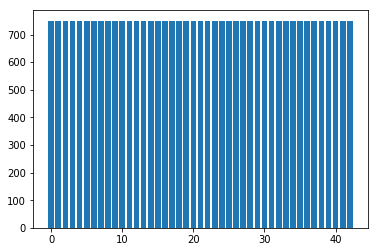

In [12]:
#Adding test dataset with 1/4 X train set

new_test = []
new_test_y_value=[]
test_idx = len(X_train)/4
#print("test idx is ", test_idx)
while(test_repeat_times[min_test_idx] > 10 and test_idx >0):
    test_index = 0
    for image in X_test:
        #print("test index is",test_index)
        test_sign = y_test[test_index]
        #print("test sign is",test_sign)
        #print("test_idx is ", test_idx)
        if(test_repeat_times[test_sign]-1>0):
            new_test_image = transform_image(image,20,10,5)
            new_test.append(new_test_image)
            new_test_y_value.append(test_sign)
            test_index += 1
            test_repeat_times[test_sign] = test_repeat_times[test_sign]-1
            #print("sign times remain ",repeat_times[sign])
            test_idx = test_idx - 1
        else:
            test_index += 1

print()
print("test repeat needed times is")
print(test_repeat_times)


X_test = np.append(X_test,new_test,axis=0)
y_test = np.append(y_test,new_test_y_value,axis=0)

# TODO: Number of testing examples.
n_test = len(X_test)
print("Number of testing examples =", n_test)


# Find the times of each sign appearance in training set
unique, counts = np.unique(y_test, return_counts=True)
dict_count = dict(zip(unique, counts))

train_count = []
for v in dict_count:
    train_count.append(dict_count[v])

plt.bar(range(43),train_count)



max valid index is  1
min test index is  0

valid repeat needed times is
[210, 0, 0, 90, 30, 30, 180, 90, 90, 90, 30, 90, 30, 0, 150, 150, 180, 120, 120, 210, 180, 180, 180, 180, 210, 90, 180, 210, 180, 210, 180, 150, 210, 150, 180, 120, 180, 210, 30, 210, 180, 210, 210]
y valid times  [(0, 30), (19, 30), (24, 30), (27, 30), (29, 30), (32, 30), (37, 30), (39, 30), (41, 30), (42, 30), (6, 60), (16, 60), (20, 60), (21, 60), (22, 60), (23, 60), (26, 60), (28, 60), (30, 60), (34, 60), (36, 60), (40, 60), (14, 90), (15, 90), (31, 90), (33, 90), (17, 120), (18, 120), (35, 120), (3, 150), (7, 150), (8, 150), (9, 150), (11, 150), (25, 150), (4, 210), (5, 210), (10, 210), (12, 210), (38, 210), (1, 240), (2, 240), (13, 240)]

valid repeat needed times is
[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Number of valid examples = 10280


<Container object of 43 artists>

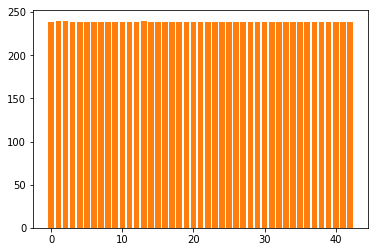

In [13]:
# Find the times of each sign appearance in valid set

unique_v, counts_v = np.unique(y_valid, return_counts=True)
dict_count_valid = dict(zip(unique_v, counts_v))

max_valid_idx = max(dict_count_valid,key=dict_count_valid.get)
print("max valid index is ", max(dict_count_valid,key=dict_count_valid.get))

min_valid_idx = min(dict_count_valid,key=dict_count_valid.get)
print("min test index is ", min(dict_count_valid,key=dict_count_valid.get))

valid_repeat_times = []
valid_graph = []
for v in dict_count_valid:
    valid_graph.append(dict_count_valid[v])
    valid_times = dict_count_valid[max_test_idx]-dict_count_valid[v]
    valid_repeat_times.append(valid_times)

print()
print("valid repeat needed times is")
print(valid_repeat_times)
plt.bar(range(43),valid_graph)

import operator
valid_sorted_count = sorted(dict_count_valid.items(), key=operator.itemgetter(1))
print("y valid times ",valid_sorted_count)


#Adding test dataset with 1/3 X train set

new_valid = []
new_valid_y_value=[]
valid_idx = len(X_train)/3
#print("test idx is ", test_idx)
while(valid_repeat_times[min_valid_idx] > 10 and valid_idx >0):
    valid_index = 0
    for image in X_valid:
        #print("test index is",test_index)
        valid_sign = y_valid[valid_index]
        #print("test sign is",test_sign)
        #print("test_idx is ", test_idx)
        if(valid_repeat_times[valid_sign]-1>0):
            new_valid_image = transform_image(image,20,10,5)
            new_valid.append(new_valid_image)
            new_valid_y_value.append(valid_sign)
            valid_index += 1
            valid_repeat_times[valid_sign] = valid_repeat_times[valid_sign]-1
            #print("sign times remain ",repeat_times[sign])
            valid_idx = valid_idx - 1
        else:
            valid_index += 1

print()
print("valid repeat needed times is")
print(valid_repeat_times)


X_valid = np.append(X_valid,new_valid,axis=0)
y_valid = np.append(y_valid,new_valid_y_value,axis=0)

# TODO: Number of testing examples.
n_valid = len(X_valid)
print("Number of valid examples =", n_valid)


# Find the times of each sign appearance in training set
unique, counts = np.unique(y_valid, return_counts=True)
dict_count = dict(zip(unique, counts))

valid_count = []
for v in dict_count:
    valid_count.append(dict_count[v])

plt.bar(range(43),valid_count)



In [14]:
# Find the times of each sign appearance in training set
unique, counts = np.unique(y_train, return_counts=True)
dict_count = dict(zip(unique, counts))

max_idx = max(dict_count,key=dict_count.get)
print("max index is ", max(dict_count,key=dict_count.get))

repeat_times = []
for v in dict_count:
    times = dict_count[max_idx]-dict_count[v]
    repeat_times.append(times)

print()
print("times is")
print(repeat_times)


import operator
sorted_count = sorted(dict_count.items(), key=operator.itemgetter(1))
print("y train times ",sorted_count)

max index is  2

times is
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y train times  [(0, 2864), (1, 2864), (3, 2864), (4, 2864), (5, 2864), (6, 2864), (7, 2864), (8, 2864), (9, 2864), (10, 2864), (11, 2864), (12, 2864), (13, 2864), (14, 2864), (15, 2864), (16, 2864), (17, 2864), (18, 2864), (19, 2864), (20, 2864), (21, 2864), (22, 2864), (23, 2864), (24, 2864), (25, 2864), (26, 2864), (27, 2864), (28, 2864), (29, 2864), (30, 2864), (31, 2864), (32, 2864), (33, 2864), (34, 2864), (35, 2864), (36, 2864), (37, 2864), (38, 2864), (39, 2864), (40, 2864), (41, 2864), (42, 2864), (2, 2865)]


max test index is  2

test times is
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y test times  [(0, 749), (1, 749), (3, 749), (4, 749), (5, 749), (6, 749), (7, 749), (8, 749), (9, 749), (10, 749), (11, 749), (12, 749), (13, 749), (14, 749), (15, 749), (16, 749), (17, 749), (18, 749), (19, 749), (20, 749), (21, 749), (22, 749), (23, 749), (24, 749), (25, 749), (26, 749), (27, 749), (28, 749), (29, 749), (30, 749), (31, 749), (32, 749), (33, 749), (34, 749), (35, 749), (36, 749), (37, 749), (38, 749), (39, 749), (40, 749), (41, 749), (42, 749), (2, 750)]


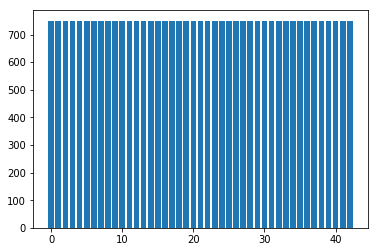

In [15]:
# Find the times of each sign appearance in test set
test_unique, test_counts = np.unique(y_test, return_counts=True)
test_dict_count = dict(zip(test_unique, test_counts))

max_test_idx = max(test_dict_count,key=test_dict_count.get)
print("max test index is ", max(test_dict_count,key=test_dict_count.get))

test_repeat_times = []
test_counts = []
for v in test_dict_count:
    test_times = test_dict_count[max_test_idx]-test_dict_count[v]
    test_counts.append(test_dict_count[v])
    test_repeat_times.append(test_times)
    

plt.bar(range(43),test_counts)
    
    
print()
print("test times is")
print(test_repeat_times)


import operator
test_sorted_count = sorted(test_dict_count.items(), key=operator.itemgetter(1))
print("y test times ",test_sorted_count)

Image data shape = (32, 32, 3)
the length of x valid is  10280
28
valid image shape = (32, 32, 3)
valid image shape = (32, 32, 3)


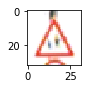

In [16]:
#color normalize all data set


new_train = []
for img in X_train:
    img = All_color_normalize2(img)
    new_img = color_normalize(img)
    new_train.append(new_img)


# TODO: What's the shape of an traffic sign image?
print("Image data shape =", image_shape)
X_train = new_train

index = random.randint(0, len(X_valid))
print("the length of x valid is ", len(X_valid))
image = X_valid[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_valid[index])


#transfer test data
new_test = []
for images in X_test:
    images = All_color_normalize2(images)
    new_test_image = color_normalize(images)
    new_test.append(new_test_image)

X_test = new_test
valid_shape2 = new_test[0].shape
print("valid image shape =",valid_shape2)


# transfer valid data
new_valid = []
for image in X_valid:
    image = All_color_normalize2(image)
    new_valid_image = color_normalize(image)
    new_valid.append(new_valid_image)
    

valid_shape = new_valid[0].shape
print("valid image shape =",valid_shape)
X_valid = new_valid


In [17]:
"""
#transfer color to grayscale

new_train = []
for image in X_train:
    new_image = rgb2gray(image)
    new_train.append(new_image)

new_train_reshape = np.reshape(new_train,(-1,32,32,1))
# TODO: What's the shape of an traffic sign image?
image_shape = new_train_reshape[0].shape
print("Image data shape =", image_shape)
X_train = new_train_reshape

index = random.randint(0, len(X_valid))
print("the length of x train is ", len(X_train))
image = X_valid[index]

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])


# transfer valid data
new_valid = []
for image in X_valid:
    new_valid_image = rgb2gray(image)
    new_valid.append(new_valid_image)
    
new_valid_reshape = np.reshape(new_valid,(-1,32,32,1))
valid_shape = new_valid_reshape[0].shape
print("valid image shape =",valid_shape)
X_valid = new_valid_reshape
"""

'\n#transfer color to grayscale\n\nnew_train = []\nfor image in X_train:\n    new_image = rgb2gray(image)\n    new_train.append(new_image)\n\nnew_train_reshape = np.reshape(new_train,(-1,32,32,1))\n# TODO: What\'s the shape of an traffic sign image?\nimage_shape = new_train_reshape[0].shape\nprint("Image data shape =", image_shape)\nX_train = new_train_reshape\n\nindex = random.randint(0, len(X_valid))\nprint("the length of x train is ", len(X_train))\nimage = X_valid[index]\n\nplt.figure(figsize=(1,1))\nplt.imshow(image)\nprint(y_train[index])\n\n\n# transfer valid data\nnew_valid = []\nfor image in X_valid:\n    new_valid_image = rgb2gray(image)\n    new_valid.append(new_valid_image)\n    \nnew_valid_reshape = np.reshape(new_valid,(-1,32,32,1))\nvalid_shape = new_valid_reshape[0].shape\nprint("valid image shape =",valid_shape)\nX_valid = new_valid_reshape\n'

27
1


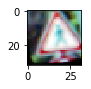

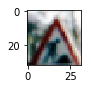

In [18]:

index = random.randint(0, len(X_train))
index2 = random.randint(0, len(X_train))
#print("the length of x train is ", len(X_train))
image = X_train[index].squeeze()
image2 = X_train[index2].squeeze()
#print(image[0][0][0])

#def rgb2gray2(rgb):
#    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

plt.figure(figsize=(1,1))   
plt.imshow(image)


plt.figure(figsize=(1,1))
plt.imshow(image2)


print(y_train[index])
print(y_train[index2])



15
33


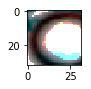

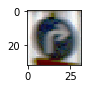

In [19]:
# check test dataset 
index = random.randint(0, len(X_test))
index2 = random.randint(0, len(X_test))
#print("the length of x train is ", len(X_train))
image = X_test[index].squeeze()
image2 = X_test[index2].squeeze()
#print(image[0][0][0])

#def rgb2gray2(rgb):
#    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

plt.figure(figsize=(1,1))   
plt.imshow(image)


plt.figure(figsize=(1,1))
plt.imshow(image2)


print(y_test[index])
print(y_test[index2])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [20]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [21]:
#shuffle images
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

Implement LeNet-5

Implement the LeNet-5 neural network architecture.

This is the only cell you need to edit.
Input

The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.
Architecture

Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 43 outputs.

In [23]:
import tensorflow as tf
#tf.GraphKeys.VARIABLES = tf.GraphKeys.GLOBAL_VARIABLES
EPOCHS = 50
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Store layers weight & bias
    weights = {
        'wc1': tf.Variable(tf.random_normal([3, 3, 3, 6],mean=mu, stddev=sigma)),
        'wc2': tf.Variable(tf.random_normal([3, 3, 6, 32],mean=mu, stddev=sigma)),
        'wd1': tf.Variable(tf.random_normal([1152, 512],mean=mu, stddev=sigma)),
        'wd2': tf.Variable(tf.random_normal([512, 512],mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.random_normal([512, 43],mean=mu, stddev=sigma))}

    biases = {
        'bc1': tf.Variable(tf.random_normal([6],mean=mu, stddev=sigma)),
        'bp1': tf.Variable(tf.random_normal([32],mean=mu, stddev=sigma)),
        'bd1': tf.Variable(tf.random_normal([512],mean=mu, stddev=sigma)),
        'bd2': tf.Variable(tf.random_normal([512],mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.random_normal([43],mean=mu, stddev=sigma))}

    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x6.

    
    x = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    x = tf.nn.bias_add(x, biases['bc1'])
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    #  Adding Dropout 
    x = tf.nn.dropout(x, keep_prob)
    # TODO: Pooling. Input = 30x30x6. Output = 15x15x16.
    x = tf.nn.max_pool(
    x,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 13x13x32.
    x = tf.nn.conv2d(x, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Adding Dropout 
    #x = tf.nn.dropout(x, keep_prob)
    # TODO: Pooling. Input = 13x13x32. Output = 6x6x32.
    x = tf.nn.max_pool(
    x,
    ksize=[1, 3, 3, 1],
    strides=[1, 2, 2, 1],
    padding='VALID')

    # TODO: Flatten. Input = 6x6x32. Output = 1152.
    x = flatten(x)
    # TODO: Layer 3: Fully Connected. Input = 1152. Output = 512.
    x = tf.add(tf.matmul(x, weights['wd1']), biases['bd1'])
    # TODO: Activation.
    x = tf.nn.relu(x)
     # Adding Dropout 
    #x = tf.nn.dropout(x, keep_prob)
    # TODO: Layer 4: Fully Connected. Input = 512. Output = 512.
    x = tf.add(tf.matmul(x, weights['wd2']), biases['bd2'])
    # TODO: Activation.
    #x = tf.nn.relu(x)
     # Adding Dropout 
    #x = tf.nn.dropout(x, keep_prob)
    # TODO: Layer 5: Fully Connected. Input = 512. Output = 43.
    logits = tf.add(tf.matmul(x, weights['out']), biases['out'])
    return logits

In [24]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [26]:
#trainging pipeline
rate = 0.001



logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate,beta1=0.8, beta2=0.9)# beta for learning rate decay tech
training_operation = optimizer.minimize(loss_operation)

In [ ]:
#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_lost = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss,accuracy = sess.run([loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y,keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        total_lost += (loss*len(batch_x))
    t_lost = total_lost/num_examples
    t_accu = total_accuracy / num_examples
    return t_lost,t_accu


In [ ]:
#Traing the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train)
    
    
    training_loss_history = []
    validation_loss_history = []
    training_accuracy_history = []
    validation_accuracy_history = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.7})
            
            
        # Log accuracy and loss every epoch
        training_loss, training_accuracy = evaluate(X_train,y_train)
        training_loss_history.append(training_loss)
        training_accuracy_history.append(training_accuracy)
        
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        validation_loss_history.append(validation_loss)
        validation_accuracy_history.append(validation_accuracy)

        print("EPOCH {} ...".format(i+1))
        print("Training loss = {:.3f}".format(training_loss))
        print("Training accuracy = {:.3f}".format(training_accuracy))
        print("Validation loss = {:.3f}".format(validation_loss))
        print("Validation accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # Evaluate on the test data
    test_loss, test_acc = evaluate(X_test, y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

    loss_plot = plt.subplot(2,1,1)
    loss_plot.set_title('Loss')
    loss_plot.plot(training_loss_history, 'r', label='Training Loss')
    loss_plot.plot(validation_loss_history, 'b', label='Validation Loss')
    loss_plot.set_xlim([0, EPOCHS])
    loss_plot.legend(loc=4)
    acc_plot = plt.subplot(2,1,2)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(training_accuracy_history,'r', label='Training Accuracy')
    acc_plot.plot(validation_accuracy_history, 'b', label='Validation Accuracy')
    acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([0, EPOCHS])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()
    
    
    saver.save(sess, './mylenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training loss = 1.198
Training accuracy = 0.663
Validation loss = 1.270
Validation accuracy = 0.605

EPOCH 2 ...
Training loss = 0.830
Training accuracy = 0.772
Validation loss = 0.919
Validation accuracy = 0.720

EPOCH 3 ...
Training loss = 0.718
Training accuracy = 0.806
Validation loss = 0.825
Validation accuracy = 0.743

EPOCH 4 ...
Training loss = 0.666
Training accuracy = 0.818
Validation loss = 0.805
Validation accuracy = 0.752

EPOCH 5 ...
Training loss = 0.588
Training accuracy = 0.840
Validation loss = 0.882
Validation accuracy = 0.752

EPOCH 6 ...
Training loss = 0.571
Training accuracy = 0.842
Validation loss = 0.781
Validation accuracy = 0.775

EPOCH 7 ...
Training loss = 0.518
Training accuracy = 0.857
Validation loss = 0.863
Validation accuracy = 0.777

EPOCH 8 ...
Training loss = 0.538
Training accuracy = 0.850
Validation loss = 0.913
Validation accuracy = 0.761

EPOCH 9 ...
Training loss = 0.477
Training accuracy = 0.873
Validation loss = 0.697

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
# read image
import os
files=os.listdir("test_images/")
image_list=[]
label_list=[]
"""
for v in files:
    image = mpimg.imread('test_images/'+v)
    resized_image = cv2.resize(image, (32, 32))
    resized_image = All_color_normalize2(resized_image)
    resized_image = color_normalize(resized_image)
    image_list.append(resized_image)
    plt.figure(figsize=(1,1))
    plt.imshow(resized_image)

image1 = image_list[0]
image2 = image_list[1]
image3 = image_list[2]
image4 = image_list[3]
image5 = image_list[4]
"""


# check test dataset 
for i in range(0,5):
    index = random.randint(0, len(X_valid))
    image_list.append(X_valid[index])
    label_list.append(y_valid[index])
    plt.figure(figsize=(1,1))
    plt.imshow(X_valid[index])
    print(y_valid[index])
    

image1 = image_list[0]
image2 = image_list[1]
image3 = image_list[2]
image4 = image_list[3]
image5 = image_list[4]

label1 = label_list[0]
label2 = label_list[1]
label3 = label_list[2]
label4 = label_list[3]
label5 = label_list[4]



#print("Image data shape =", image_shape)
#print(image1)
    
images = np.stack((image1, image2, image3, image4, image5)) #stack images after loading them
#labels = np.stack((12,13,25,27,31)) #25, 31, 12, 13, 27) # stack true values
labels = np.stack((label1,label2,label3,label4,label5,))   



### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [ ]:


softmax = tf.nn.softmax(logits)
pred = tf.nn.top_k(softmax, 5)



with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_lost,test_accuracy = evaluate(images, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    result = sess.run(pred, feed_dict={x: images,keep_prob: 1.})
    
    
    predictions  = result.values
    predictionIndicies  = result.indices
    print("predictions")
    print(predictions)
    print("predictionIndicies")
    print(predictionIndicies)


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
import tensorflow as tf
mu = 0
sigma = 0.1
    
# SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    tf_conv1 = sess.run(conv1, feed_dict={x: images})
    outputFeatureMap(images, conv1)
    tf_conv2 = sess.run(conv2, feed_dict={x: images})
    outputFeatureMap(images, conv2)

In [ ]:
mu = 0
sigma = 0.1

# TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
weight1 = tf.Variable(tf.random_normal([4, 4, 3, 6],mean=mu, stddev=sigma))
weight2 = tf.Variable(tf.random_normal([4, 4, 6, 16],mean=mu, stddev=sigma))
bias1 = tf.Variable(tf.random_normal([6],mean=mu, stddev=sigma))

conv1 = tf.nn.conv2d(x, weight1, strides=[1, 1, 1, 1], padding='VALID')
#conv1 = tf.nn.bias_add(conv1, bias1)
    
# TODO: Activation.
#conv1 = tf.nn.relu(conv1)
#  Adding Dropout 
#conv1 = tf.nn.dropout(conv1, keep_prob)
# TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
#conv1 = tf.nn.max_pool(
#    conv1,
#    ksize=[1, 2, 2, 1],
#    strides=[1, 2, 2, 1],
#    padding='VALID')
# TODO: Layer 2: Convolutional. Output = 10x10x16.
conv2 = tf.nn.conv2d(conv1, weight2, strides=[1, 1, 1, 1], padding='VALID')
    
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    tf_conv1 = sess.run(conv1, feed_dict={x: images})
    outputFeatureMap(images, conv1)
    tf_conv2 = sess.run(conv2, feed_dict={x: images})
    outputFeatureMap(images, conv2)    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 